## Cleaning

In [ ]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm;



In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df

,property,city,area,category,rating,price
0,شاليه بمسبح وغرفة نوم,الرياض - حي المناخ,مساحة الوحدة 148 م2,مخصص لل عوائل و عزاب,10,500
1,شاليه بصالة مطلة على المسبح,الرياض - حي المناخ,مساحة الوحدة 148 م2,مخصص لل عوائل و عزاب,10,500
2,شاليه بجلسة خارجية على المسبح,الرياض - حي المناخ,مساحة الوحدة 148 م2,مخصص لل عوائل و عزاب,10,500
3,شاليه بمسطح اخضر وجلسة خارجية,الرياض - حي المناخ,مساحة الوحدة 148 م2,مخصص لل عوائل و عزاب,10,500
4,شاليه بجلسة تطل على مسبح داخلي,الرياض - حي الرمال,مساحة الوحدة 450 م2,مخصص لل عوائل و عزاب,9.5,450
...,...,...,...,...,...,...
2415,شقة بغرفة جلوس وغرفة نوم,الرياض - حي غرناطة,مساحة الوحدة 175 م2,مخصص لل عوائل فقط,0,400
2416,مخيم بجلسة خارجية وألعاب أطفال,الرياض - حي بنبان,مساحة الوحدة 1000 م2,مخصص لل عوائل فقط,4.8,800
2417,مخيم بملعب طائره وبروجكتر (قسم رجال),الرياض - حي الثمامة,مساحة الوحدة 2000 م2,مخصص لل عوائل و عزاب,0,"1,200"
2418,شقة بغرفتين نوم وغرفة جلوس,الرياض - حي الملقا,مساحة الوحدة 200 م2,مخصص لل عوائل و عزاب,7.1,390


In [ ]:
# inspect dataset shape.
df.shape

(2420, 6)

In [ ]:
# inspect data type for each column.
df.dtypes



property    object
city        object
area        object
category    object
rating      object
price       object
dtype: object

In [ ]:
# inspect data set for missing values
df.isna().sum() 

property    2
city        0
area        0
category    0
rating      0
price       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   property  2418 non-null   object
 1   city      2420 non-null   object
 2   area      2420 non-null   object
 3   category  2420 non-null   object
 4   rating    2420 non-null   object
 5   price     2420 non-null   object
dtypes: object(6)
memory usage: 113.6+ KB


In [ ]:
df.city.value_counts()[df.city.value_counts().values>10].index

Index([' الرياض - حي الرمال', ' الرياض - حي الثمامة', ' الرياض - حي القيروان',
       ' الرياض - حي العارض', ' الرياض - حي نمار', ' الرياض - العمارية',
       ' الرياض - حي المهدية', ' الرياض - حي بنبان', ' الرياض - حي ديراب',
       ' الرياض - حي الملقا', ' الرياض - حي العاذرية', ' الرياض - الدرعية',
       ' الرياض - حي الجبيلة', ' الرياض - العوالي (نمار)',
       ' الرياض - حي ظهرة لبن', ' الرياض - حي الخير',
       ' الرياض - حي ضاحية نمار', ' الرياض - حي قرطبة', ' الرياض - حي العليا',
       ' الرياض - حي النرجس', ' الرياض - حي الفلاح', ' الرياض - حي المربع',
       ' الرياض - حي الياسمين', ' الرياض - حي لبن', ' الرياض - حي عريض',
       ' الرياض - حي المناخ', ' الرياض - حي الطوقي', ' الرياض - حي حطين',
       ' الرياض - حي الصحافة', ' الرياض - حي السعادة', ' الرياض - القدية',
       ' المزاحمية - حي الخرارة', ' الرياض - حي المونسية',
       ' المزاحمية - حي الفيصلية', ' الرياض - حي الرفيعة',
       ' الرياض - حي الجنادرية', ' الرياض - حي العوالي', ' الرياض - حي الروضة',
       ' 

In [ ]:
df.city.value_counts()

 الرياض - حي الرمال           680
 الرياض - حي الثمامة          212
 الرياض - حي القيروان         103
 الرياض - حي العارض           100
 الرياض - حي نمار              67
                             ... 
 الرياض - حي الخليج             1
 الرياض - حي الناصرية           1
 المزاحمية - حي طويق            1
 الرياض - أم الحمام الغربي      1
 القرينه - حي القرينه           1
Name: city, Length: 124, dtype: int64

In [ ]:
df_clean = df.copy()
df_clean['property_type'] = ''

In [ ]:
df_clean

,property,city,area,category,rating,price,property_type
0,شاليه بمسبح وغرفة نوم,الرياض - حي المناخ,مساحة الوحدة 148 م2,مخصص لل عوائل و عزاب,10,500,
1,شاليه بصالة مطلة على المسبح,الرياض - حي المناخ,مساحة الوحدة 148 م2,مخصص لل عوائل و عزاب,10,500,
2,شاليه بجلسة خارجية على المسبح,الرياض - حي المناخ,مساحة الوحدة 148 م2,مخصص لل عوائل و عزاب,10,500,
3,شاليه بمسطح اخضر وجلسة خارجية,الرياض - حي المناخ,مساحة الوحدة 148 م2,مخصص لل عوائل و عزاب,10,500,
4,شاليه بجلسة تطل على مسبح داخلي,الرياض - حي الرمال,مساحة الوحدة 450 م2,مخصص لل عوائل و عزاب,9.5,450,
...,...,...,...,...,...,...,...
2415,شقة بغرفة جلوس وغرفة نوم,الرياض - حي غرناطة,مساحة الوحدة 175 م2,مخصص لل عوائل فقط,0,400,
2416,مخيم بجلسة خارجية وألعاب أطفال,الرياض - حي بنبان,مساحة الوحدة 1000 م2,مخصص لل عوائل فقط,4.8,800,
2417,مخيم بملعب طائره وبروجكتر (قسم رجال),الرياض - حي الثمامة,مساحة الوحدة 2000 م2,مخصص لل عوائل و عزاب,0,"1,200",
2418,شقة بغرفتين نوم وغرفة جلوس,الرياض - حي الملقا,مساحة الوحدة 200 م2,مخصص لل عوائل و عزاب,7.1,390,


In [ ]:
#drob null values by rows
df_clean.dropna(subset=['property'],inplace=True) 

In [ ]:
df_clean.area = df_clean.area.str.extract(r'(\d+)')

In [ ]:
df_clean.price = df_clean.price.str.replace(',', '')

In [ ]:
df_clean[['price','area']] = df_clean[['price','area']].astype('int64') 
df_clean['rating'] = df_clean['rating'].astype('float') 
df_clean

,property,city,area,category,rating,price,property_type
0,شاليه بمسبح وغرفة نوم,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,
1,شاليه بصالة مطلة على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,
2,شاليه بجلسة خارجية على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,
3,شاليه بمسطح اخضر وجلسة خارجية,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,
4,شاليه بجلسة تطل على مسبح داخلي,الرياض - حي الرمال,450,مخصص لل عوائل و عزاب,9.5,450,
...,...,...,...,...,...,...,...
2414,شقة بصالة وغرفتين نوم,الرياض - حي النهضة,200,مخصص لل عوائل و عزاب,0.0,249,
2415,شقة بغرفة جلوس وغرفة نوم,الرياض - حي غرناطة,175,مخصص لل عوائل فقط,0.0,400,
2416,مخيم بجلسة خارجية وألعاب أطفال,الرياض - حي بنبان,1000,مخصص لل عوائل فقط,4.8,800,
2417,مخيم بملعب طائره وبروجكتر (قسم رجال),الرياض - حي الثمامة,2000,مخصص لل عوائل و عزاب,0.0,1200,


In [ ]:

for index, row in df_clean.iterrows():
    string = row['property']
    pattern = re.search('شاليه|فيلا|شالية|كوخ',string, re.I)
    if pattern:
        df_clean.loc[index,'property_type'] = 'chalet'
        
        
    pattern = re.search('مخيم|خيمه|كرفان|خيمة',string, re.I)
    if pattern:
        df_clean.loc[index,'property_type'] = 'camp'
        
        
    pattern = re.search('شقة|استديو|غرفة|شقه|استوديو|دورارضي',string, re.I)
    if pattern:
        df_clean.loc[index,'property_type'] = 'apartment'
        
        
    pattern = re.search('مزرعة|استراحة|استراحه|مزرعه|اسطبل|إسطبل|إستراحه|أستراحة',string, re.I)
    if pattern:
        df_clean.loc[index,'property_type'] = 'farm'
        
        
    pattern = re.search('منتجع',string, re.I)
    if pattern:
        df_clean.loc[index,'property_type'] = 'resort'
        

In [ ]:
df_clean.drop(df_clean[df_clean.property_type == ''].index , inplace=True)

In [ ]:
df_clean

,property,city,area,category,rating,price,property_type
0,شاليه بمسبح وغرفة نوم,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,apartment
1,شاليه بصالة مطلة على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet
2,شاليه بجلسة خارجية على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet
3,شاليه بمسطح اخضر وجلسة خارجية,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet
4,شاليه بجلسة تطل على مسبح داخلي,الرياض - حي الرمال,450,مخصص لل عوائل و عزاب,9.5,450,chalet
...,...,...,...,...,...,...,...
2414,شقة بصالة وغرفتين نوم,الرياض - حي النهضة,200,مخصص لل عوائل و عزاب,0.0,249,apartment
2415,شقة بغرفة جلوس وغرفة نوم,الرياض - حي غرناطة,175,مخصص لل عوائل فقط,0.0,400,apartment
2416,مخيم بجلسة خارجية وألعاب أطفال,الرياض - حي بنبان,1000,مخصص لل عوائل فقط,4.8,800,camp
2417,مخيم بملعب طائره وبروجكتر (قسم رجال),الرياض - حي الثمامة,2000,مخصص لل عوائل و عزاب,0.0,1200,camp


In [ ]:
df.property.value_counts().index       

Index(['شاليه بمسطح اخضر', 'مخيم  بجلسة خارجية وبيت شعر ', 'شاليه بركن شواء ',
       'شاليه بمسبح وجلسة خارجية', 'مخيم بجلسة خارجية وبيت شعر ',
       'شاليه بجلسة مطلة على المسبح', 'شاليه بجلسة تطل على مسبح خارجي ',
       'شاليه بجلسة خارجية ومسطح اخضر', 'شاليه بمسطح اخضر ومسبح',
       'مخيم بجلسة عريش وبيت شعر ',
       ...
       'استراحة بالعاب اطفال وجلسات خارجيه ',
       'شاليه بصاله مطلة على المسبح وغرفة نوم',
       'فيلا بجلسة خارجية و 4غرف نوم ', 'شاليه بغرفة نوم و مسبح ',
       'شاليه بجلسة خارجيه ', 'استراحة قسمين بصاله ومجلس بمشب',
       'استراحه بمجلس رئيسي و مسطحات خضراء', 'استديو راقي بدخول ذاتي',
       'شاليه غرفة نوم وصالة مع المطبخ',
       'شاليه بصالة مطلع على الجلسة الخارجية'],
      dtype='object', length=1297)

In [ ]:
df_clean[['pool', 'garden','outdoor','play_area']]= 0
df_clean

,property,city,area,category,rating,price,property_type,pool,garden,outdoor,play_area
0,شاليه بمسبح وغرفة نوم,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,apartment,0,0,0,0
1,شاليه بصالة مطلة على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,0,0,0,0
2,شاليه بجلسة خارجية على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,0,0,0,0
3,شاليه بمسطح اخضر وجلسة خارجية,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,0,0,0,0
4,شاليه بجلسة تطل على مسبح داخلي,الرياض - حي الرمال,450,مخصص لل عوائل و عزاب,9.5,450,chalet,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2414,شقة بصالة وغرفتين نوم,الرياض - حي النهضة,200,مخصص لل عوائل و عزاب,0.0,249,apartment,0,0,0,0
2415,شقة بغرفة جلوس وغرفة نوم,الرياض - حي غرناطة,175,مخصص لل عوائل فقط,0.0,400,apartment,0,0,0,0
2416,مخيم بجلسة خارجية وألعاب أطفال,الرياض - حي بنبان,1000,مخصص لل عوائل فقط,4.8,800,camp,0,0,0,0
2417,مخيم بملعب طائره وبروجكتر (قسم رجال),الرياض - حي الثمامة,2000,مخصص لل عوائل و عزاب,0.0,1200,camp,0,0,0,0


In [ ]:

for index, row in df_clean.iterrows():
    string = row['property']
    pattern = re.search('مسبح|بمسبح|المسبح',string, re.I)
    if pattern:
        df_clean.loc[index,'pool'] = 1
        
        
    pattern = re.search('مسطح|اخضر|بمسطح',string, re.I)
    if pattern:
        df_clean.loc[index,'garden'] = 1
        
        
    pattern = re.search('جلسة|بجلسة|خارجية|جلسه|شواء|خارجي|خارجيه|حديقة|الحديقة',string, re.I)
    if pattern:
        df_clean.loc[index,'outdoor'] = 1
        
        
    pattern = re.search('العاب|ألعاب|ملعب|أطفال|بملعب|اطفال',string, re.I)
    if pattern:
        df_clean.loc[index,'play_area'] = 1


In [ ]:
df_clean

,property,city,area,category,rating,price,property_type,pool,garden,outdoor,play_area
0,شاليه بمسبح وغرفة نوم,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,apartment,1,0,0,0
1,شاليه بصالة مطلة على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,1,0,0,0
2,شاليه بجلسة خارجية على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,1,0,1,0
3,شاليه بمسطح اخضر وجلسة خارجية,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,0,1,1,0
4,شاليه بجلسة تطل على مسبح داخلي,الرياض - حي الرمال,450,مخصص لل عوائل و عزاب,9.5,450,chalet,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2414,شقة بصالة وغرفتين نوم,الرياض - حي النهضة,200,مخصص لل عوائل و عزاب,0.0,249,apartment,0,0,0,0
2415,شقة بغرفة جلوس وغرفة نوم,الرياض - حي غرناطة,175,مخصص لل عوائل فقط,0.0,400,apartment,0,0,0,0
2416,مخيم بجلسة خارجية وألعاب أطفال,الرياض - حي بنبان,1000,مخصص لل عوائل فقط,4.8,800,camp,0,0,1,1
2417,مخيم بملعب طائره وبروجكتر (قسم رجال),الرياض - حي الثمامة,2000,مخصص لل عوائل و عزاب,0.0,1200,camp,0,0,0,1


In [ ]:
df_clean.category.value_counts()

 مخصص لل عوائل و عزاب    1626
 مخصص لل عوائل فقط        770
 مخصص لل عزاب فقط           6
Name: category, dtype: int64

In [ ]:
df_clean[['family', 'single','family_and_single']]= 0
df_clean

,property,city,area,category,rating,price,property_type,pool,garden,outdoor,play_area,family,single,family_and_single
0,شاليه بمسبح وغرفة نوم,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,apartment,1,0,0,0,0,0,0
1,شاليه بصالة مطلة على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,1,0,0,0,0,0,0
2,شاليه بجلسة خارجية على المسبح,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,1,0,1,0,0,0,0
3,شاليه بمسطح اخضر وجلسة خارجية,الرياض - حي المناخ,148,مخصص لل عوائل و عزاب,10.0,500,chalet,0,1,1,0,0,0,0
4,شاليه بجلسة تطل على مسبح داخلي,الرياض - حي الرمال,450,مخصص لل عوائل و عزاب,9.5,450,chalet,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,شقة بصالة وغرفتين نوم,الرياض - حي النهضة,200,مخصص لل عوائل و عزاب,0.0,249,apartment,0,0,0,0,0,0,0
2415,شقة بغرفة جلوس وغرفة نوم,الرياض - حي غرناطة,175,مخصص لل عوائل فقط,0.0,400,apartment,0,0,0,0,0,0,0
2416,مخيم بجلسة خارجية وألعاب أطفال,الرياض - حي بنبان,1000,مخصص لل عوائل فقط,4.8,800,camp,0,0,1,1,0,0,0
2417,مخيم بملعب طائره وبروجكتر (قسم رجال),الرياض - حي الثمامة,2000,مخصص لل عوائل و عزاب,0.0,1200,camp,0,0,0,1,0,0,0


In [ ]:
df_clean.loc[df_clean[df_clean.category == ' مخصص لل عوائل و عزاب'].index ,'family_and_single']=1
df_clean.loc[df_clean[df_clean.category == ' مخصص لل عوائل فقط'].index ,'family']=1
df_clean.loc[df_clean[df_clean.category == ' مخصص لل عزاب فقط'].index ,'single']=1

In [ ]:
df_clean.drop(columns =['property','category','city', 'family_and_single'],inplace= True)

In [ ]:
df_clean = pd.get_dummies(df_clean, columns=['property_type'],drop_first = False)
df_clean.columns

Index(['area', 'rating', 'price', 'pool', 'garden', 'outdoor', 'play_area',
       'family', 'single', 'property_type_apartment', 'property_type_camp',
       'property_type_chalet', 'property_type_farm', 'property_type_resort'],
      dtype='object')

In [ ]:
df_clean

,area,rating,price,pool,garden,outdoor,play_area,family,single,property_type_apartment,property_type_camp,property_type_chalet,property_type_farm,property_type_resort
0,148,10.0,500,1,0,0,0,0,0,1,0,0,0,0
1,148,10.0,500,1,0,0,0,0,0,0,0,1,0,0
2,148,10.0,500,1,0,1,0,0,0,0,0,1,0,0
3,148,10.0,500,0,1,1,0,0,0,0,0,1,0,0
4,450,9.5,450,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,200,0.0,249,0,0,0,0,0,0,1,0,0,0,0
2415,175,0.0,400,0,0,0,0,1,0,1,0,0,0,0
2416,1000,4.8,800,0,0,1,1,1,0,0,1,0,0,0
2417,2000,0.0,1200,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
df_clean.to_csv('clean_data.csv', index = False)

In [ ]:
df = pd.read_csv('clean_data.csv')
df

,area,rating,price,pool,garden,outdoor,play_area,family,single,property_type_apartment,property_type_camp,property_type_chalet,property_type_farm,property_type_resort
0,148,10.0,500,1,0,0,0,0,0,1,0,0,0,0
1,148,10.0,500,1,0,0,0,0,0,0,0,1,0,0
2,148,10.0,500,1,0,1,0,0,0,0,0,1,0,0
3,148,10.0,500,0,1,1,0,0,0,0,0,1,0,0
4,450,9.5,450,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,200,0.0,249,0,0,0,0,0,0,1,0,0,0,0
2398,175,0.0,400,0,0,0,0,1,0,1,0,0,0,0
2399,1000,4.8,800,0,0,1,1,1,0,0,1,0,0,0
2400,2000,0.0,1200,0,0,0,1,0,0,0,1,0,0,0


## EDA

In [ ]:
df = pd.read_csv('clean_data.csv')
df

,area,rating,price,pool,garden,outdoor,play_area,family,single,property_type_apartment,property_type_camp,property_type_chalet,property_type_farm,property_type_resort
0,148,10.0,500,1,0,0,0,0,0,1,0,0,0,0
1,148,10.0,500,1,0,0,0,0,0,0,0,1,0,0
2,148,10.0,500,1,0,1,0,0,0,0,0,1,0,0
3,148,10.0,500,0,1,1,0,0,0,0,0,1,0,0
4,450,9.5,450,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397,200,0.0,249,0,0,0,0,0,0,1,0,0,0,0
2398,175,0.0,400,0,0,0,0,1,0,1,0,0,0,0
2399,1000,4.8,800,0,0,1,1,1,0,0,1,0,0,0
2400,2000,0.0,1200,0,0,0,1,0,0,0,1,0,0,0


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: price.

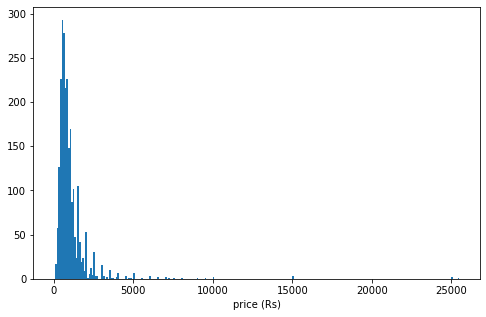

In [ ]:
# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, df['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'price', bins = bins)
plt.xlabel('price (Rs)')
plt.show()

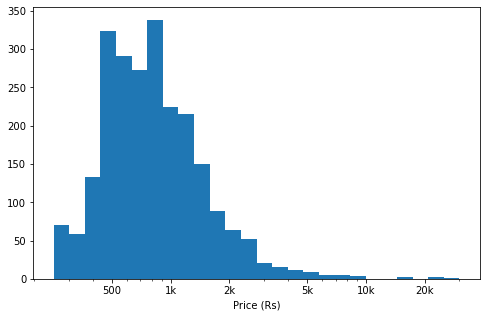

In [ ]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.08
bins = 10 ** np.arange(2.4, np.log10(df['price'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'price', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price (Rs)')
plt.show()

#### Price has a long-tailed distribution, with one peak between 400 Rs and 2000 Rs, and few on the high price end.
#### there's a steep jump in frequency right before 500, rather than a smooth ramp up.

Next up, exploring the numerical features area and rating variables.

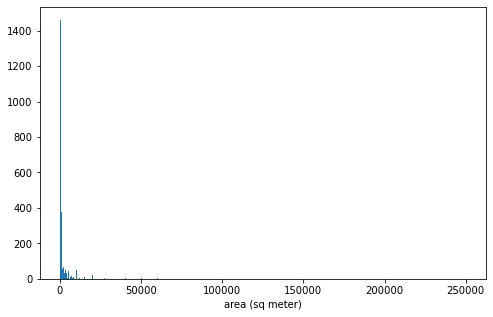

In [ ]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['area'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'area', bins = bins)
plt.xlabel('area (sq meter)')
plt.show()

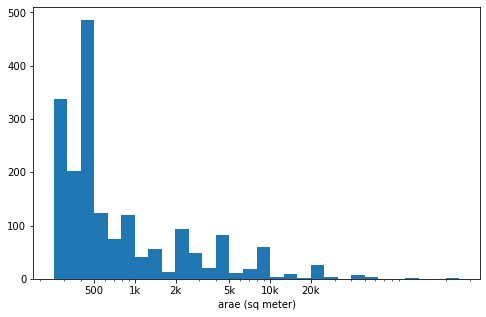

In [ ]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(2.4, np.log10(df['area'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'area', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('arae (sq meter)')
plt.show()

#### Price has a very long-tailed distribution.
#### there's a steep jump in frequency on the low range, rather than a smooth ramp up.

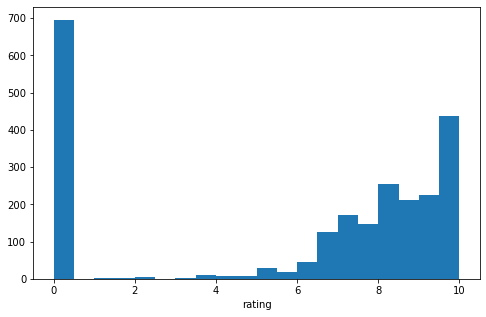

In [ ]:
# start with a standard-scaled plot
binsize = .5
bins = np.arange(0, df['rating'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'rating', bins = bins)
plt.xlabel('rating')
plt.show()

#### rating have a left skew tailed distribution, left smoth up with alot of data at the zero. 

The initial plot of the price, area, and rating features show some immediate points of attention. On the price and area plots, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. While the rating have many miss leading observation at the zero. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [ ]:
# select low outliers, using criteria eyeballed from the plots

price_outliers = (df['price'] > 10000) 
area_outliers = (df['area'] > 10000)
print('price outliers: {}\n'.format(price_outliers.sum()))
print(df.loc[price_outliers,:])

print('\n\n area outliers: {}\n'.format(area_outliers.sum()))
print(df.loc[area_outliers,:])

price outliers: 6

       area  rating  price  pool  garden  outdoor  play_area  family  single  \
318    3600     9.8  15000     0       0        1          0       0       0   
764   20000     7.6  15000     0       1        0          0       0       0   
914     288     0.0  25000     0       0        0          0       0       0   
915     288     0.0  25000     0       0        0          0       0       0   
916     500     0.0  15000     0       0        0          0       1       0   
1553    141     9.9  25416     0       0        0          0       0       0   

      property_type_apartment  property_type_camp  property_type_chalet  \
318                         0                   0                     0   
764                         0                   0                     0   
914                         0                   1                     0   
915                         0                   1                     0   
916                         0                

It is a few line to drop rather than miss leading propablity.

In [ ]:
index_to_drop = (df[price_outliers].index.union(df[area_outliers].index))
index_to_drop

Int64Index([  22,   23,   42,   63,   64,   82,   96,  105,  124,  147,  160,
             237,  262,  318,  764,  768,  769,  782,  786,  788,  819,  826,
             827,  828,  908,  911,  914,  915,  916, 1004, 1098, 1131, 1152,
            1170, 1183, 1211, 1239, 1307, 1367, 1370, 1497, 1553, 1557, 1628,
            1645, 1658, 1707, 1738, 1759, 1760, 1852, 1879, 2073, 2153, 2230,
            2276, 2284, 2304, 2335, 2370, 2389],
           dtype='int64')

In [ ]:
df = df.drop (index = index_to_drop)

Rating of zero will be replaced by each property category rating mean to avoid miss leading

In [ ]:
camp_rating_mean = df[df.property_type_camp==1].rating.mean()
farm_rating_mean = df[df.property_type_farm==1].rating.mean()
chalet_rating_mean = df[df.property_type_chalet==1].rating.mean()
resort_rating_mean = df[df.property_type_resort==1].rating.mean()
apartment_rating_mean = df[df.property_type_apartment==1].rating.mean()

In [ ]:
camp_mask = df[(df.property_type_camp==1 )&(df.rating==0)]
farm_mask = df[(df.property_type_farm==1 )&(df.rating==0)]
chalet = df[(df.property_type_chalet==1 )&(df.rating==0)]
resort_mask = df[(df.property_type_resort==1 )&(df.rating==0)]
apartment_mask = df[(df.property_type_apartment==1 )&(df.rating==0)]

df.loc[camp_mask.index, 'rating'] = camp_rating_mean
df.loc[farm_mask.index, 'rating'] = farm_rating_mean
df.loc[chalet.index, 'rating'] = chalet_rating_mean
df.loc[resort_mask.index, 'rating'] = resort_rating_mean
df.loc[apartment_mask.index, 'rating'] = apartment_rating_mean

df = df.round(1)
df = df.reset_index(drop=True)

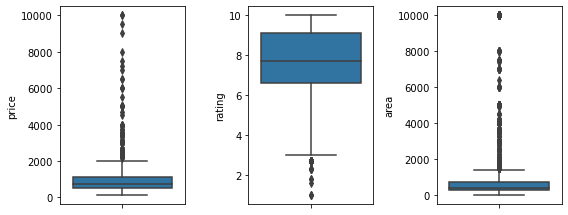

In [ ]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = df['price']) 

subplot(2,3,2)
sns.boxplot(y = df['rating'])

subplot(2,3,3)
sns.boxplot(y = df['area'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

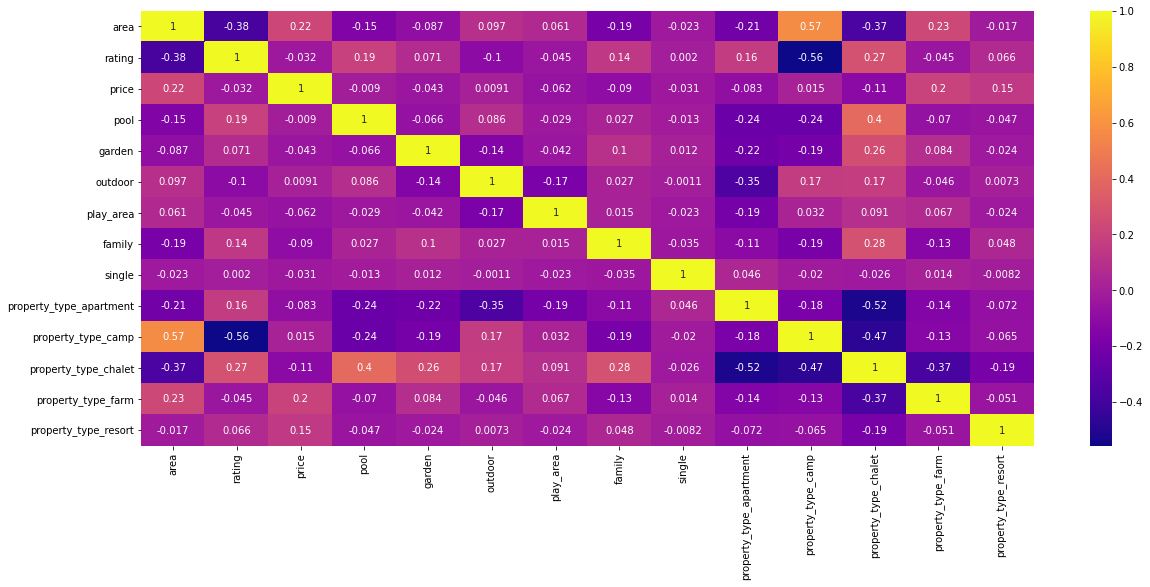

In [ ]:
# creating heat map to understand the correlation between variables
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap="plasma");

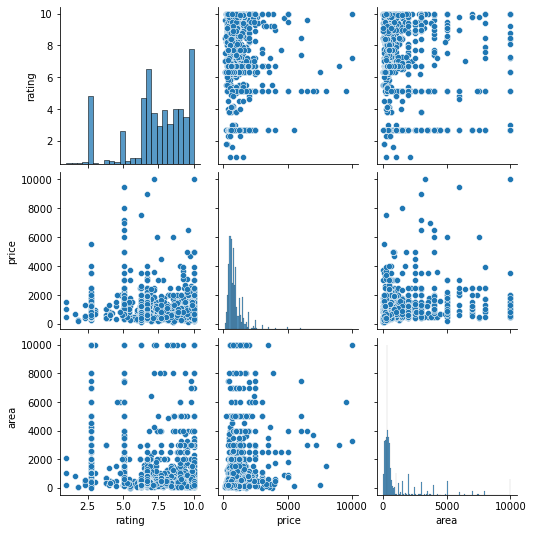

In [ ]:
sns.pairplot(df[['rating', 'price', 'area']]);

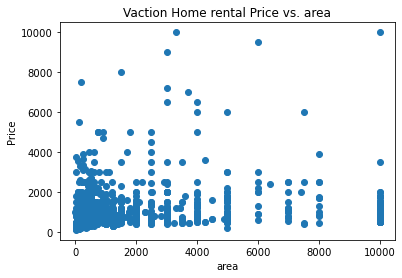

In [ ]:
plt.scatter(df['area'], df['price']);
plt.xlabel('area');
plt.ylabel('Price');
plt.title('Vaction Home rental Price vs. area');

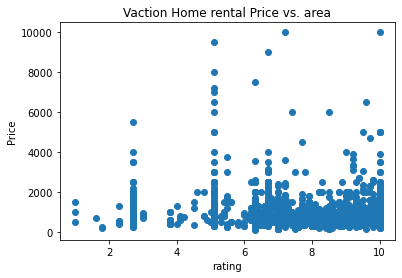

In [ ]:
plt.scatter(df['rating'], df['price']);
plt.xlabel('rating');
plt.ylabel('Price');
plt.title('Vaction Home rental Price vs. area');

In [ ]:
df

,area,rating,price,pool,garden,outdoor,play_area,family,single,property_type_apartment,property_type_camp,property_type_chalet,property_type_farm,property_type_resort
0,148,10.0,500,1,0,0,0,0,0,1,0,0,0,0
1,148,10.0,500,1,0,0,0,0,0,0,0,1,0,0
2,148,10.0,500,1,0,1,0,0,0,0,0,1,0,0
3,148,10.0,500,0,1,1,0,0,0,0,0,1,0,0
4,450,9.5,450,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,200,6.3,249,0,0,0,0,0,0,1,0,0,0,0
2337,175,6.3,400,0,0,0,0,1,0,1,0,0,0,0
2338,1000,4.8,800,0,0,1,1,1,0,0,1,0,0,0
2339,2000,2.7,1200,0,0,0,1,0,0,0,1,0,0,0


## linear regression

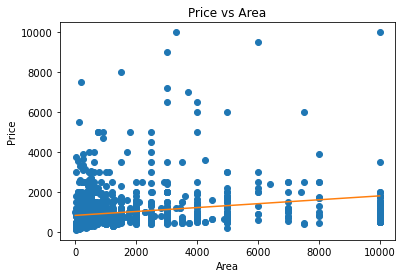

In [ ]:
## To show the line that was fit I used the following code from 
## https://plot.ly/matplotlib/linear-fits/
## It isn't the greatest fit... but it isn't awful either


#import chart_studio.plotly as py
#import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

xi = arange(0,10000)


# (Almost) linear sequence
y = df['price']
x = df['area']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*xi+intercept

plt.plot(x,y,'o', xi, line);
plt.xlabel('Area');
plt.ylabel('Price');
pylab.title('Price vs Area');

In [ ]:
import statsmodels.api as sms;

df['intercept'] = 1

lm = sms.OLS(df['price'], df[['intercept', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     122.0
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           1.08e-27
Time:                        02:43:50   Log-Likelihood:                -18903.
No. Observations:                2341   AIC:                         3.781e+04
Df Residuals:                    2339   BIC:                         3.782e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    846.9246     18.475     45.842      0.000     810.696     883.153
area           0.0974      0.009     11.047      0.000       0.080       0.115
==============================================================================
Omnibus:                     2291.406   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129172.790
Skew:                           4.664   Prob(JB):                         0.00
Kurtosis:                      38.175   Cond. No.                     2.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

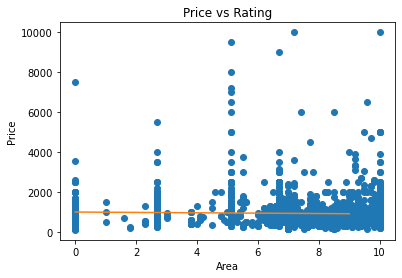

In [ ]:
## To show the line that was fit I used the following code from 
## https://plot.ly/matplotlib/linear-fits/
## It isn't the greatest fit... but it isn't awful either


#import chart_studio.plotly as py
#import plotly.graph_objs as go

# MatPlotlib
import matplotlib.pyplot as plt
from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

xi = arange(0,10)


# (Almost) linear sequence
y = df['price']
x = df['rating']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*xi+intercept

plt.plot(x,y,'o', xi, line);
plt.xlabel('Area');
plt.ylabel('Price');
pylab.title('Price vs Rating');

In [ ]:
from sklearn.datasets import load_boston
import statsmodels.api as sms;

df['intercept'] = 1

lm = sms.OLS(df['price'], df[['intercept', 'rating']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.245
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.134
Time:                        02:43:51   Log-Likelihood:                -18962.
No. Observations:                2341   AIC:                         3.793e+04
Df Residuals:                    2339   BIC:                         3.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1014.2649     47.467     21.368      0.000     921.183    1107.346
rating        -9.3984      6.272     -1.498      0.134     -21.698       2.901
==============================================================================
Omnibus:                     2365.152   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147296.850
Skew:                           4.882   Prob(JB):                         0.00
Kurtosis:                      40.613   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression:

# Splitting the data

In [ ]:
X = df.drop(['price'], axis = 1)
y = df['price']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_data = df.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
                 X_data, df['price'], test_size=0.2, random_state=0)

# Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print(r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_squared_error(lr.predict(X_test), y_test))  


0.12011344739239938
Mean Absolute Error: 474587.9018648391


In [ ]:
val_score = lr.score(X_val, y_val)  
val_score

0.15316633215536146

In [ ]:
train_score = lr.score(X_train, y_train)
train_score

0.12199124024976982

In [ ]:
test_score = lr.score(X_test, y_test)
test_score

0.12011344739239938

### the model have low score and need to optimization, so first we will check the variance inflation factor VIF

In [ ]:
from patsy import dmatrices
# get y and X dataframes based on this regression:
y, X = dmatrices('price ~ rating + area + pool + garden + outdoor + play_area + family + single+ property_type_camp + property_type_chalet + property_type_farm + property_type_resort ' , df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,13.756083,Intercept
1,1.270840,rating
2,1.738965,area
3,1.308125,pool
4,1.285464,garden
5,1.342243,outdoor
6,1.165886,play_area
7,1.117126,family
8,1.005143,single
9,2.727807,property_type_camp


### Since all variable have VIF less than 10 so no need to drop any variable
### we may need to get more data. Increase the data size will increase score value of the model.

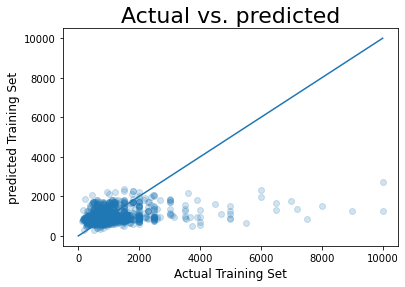

In [ ]:
# Actual Training Set(x) vs. predicted Training Set(y)
y_train_pred = lr.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set', size=12)
plt.plot([0, 10000], [0, 10000])
plt.show()

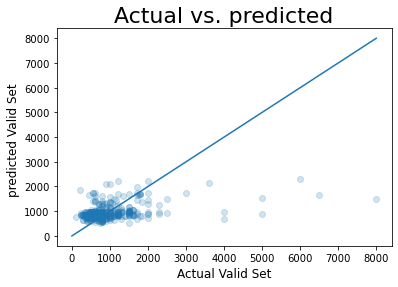

In [ ]:
# Actual validation Set(x) vs. predicted validation Set(y)
y_val_pred = lr.predict(X_val)#cross valid do train only 

plt.scatter(y_val, y_val_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Valid Set', size=12)
plt.ylabel('predicted Valid Set ', size=12)
plt.plot([0, 8000], [0, 8000])
plt.show()

# Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly= poly.transform(X_test)
X_val_poly= poly.transform(X_val)

Plr = LinearRegression()
Plr.fit(X_train_poly, y_train)
print('Mean Absolute Error:', mean_squared_error(Plr.predict(X_test_poly), y_test))  


Mean Absolute Error: 523068.93108737067


In [ ]:
print(Plr.score(X_train_poly, y_train))

0.3194394378107599


In [ ]:
print(Plr.score(X_test_poly, y_test))

0.030229559704022413


In [ ]:
print(Plr.score(X_val_poly, y_val))

0.272339487383663


# Lasso

Lasso Model:


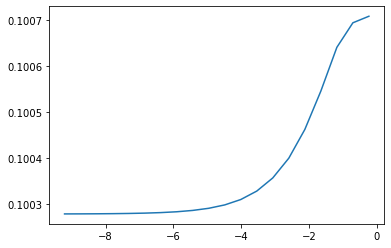

In [ ]:
kfold = KFold(n_splits=15, shuffle=True, random_state=0)
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df_L = pd.DataFrame(grid_est.cv_results_)
df_L["alpha"] = df_L.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df_L.alpha), df_L.mean_test_score);

In [ ]:
grid_est.best_estimator_

Lasso(alpha=0.7943282347242815)

In [ ]:
params['alpha']

array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

# Ridge

Ridge Model:


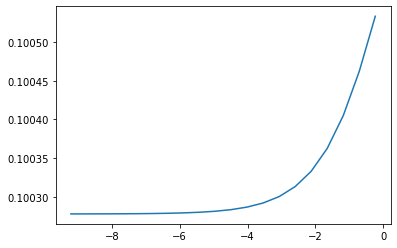

In [ ]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est_R = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est_R.fit(X_train, y_train)
df_R = pd.DataFrame(grid_est_R.cv_results_)
df_R["alpha"] = df_R.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df_R.alpha), df_R.mean_test_score);

In [ ]:
y_pred = grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

y_pred = grid_est_R.predict(X_test)
print("Ridge Regression:", r2_score(y_test, y_pred))

Lasso Regression: 0.12012808013740206
Ridge Regression: 0.12039816757568433


In [ ]:
y_pred = grid_est.predict(X_val)
print("Lasso Regression:", r2_score(y_val, y_pred))

y_pred = grid_est_R.predict(X_val)
print("Ridge Regression:", r2_score(y_val, y_pred))

Lasso Regression: 0.1507771573729756
Ridge Regression: 0.15228434416462266


# LinearRegression best result

In [ ]:
indp = df.drop(['price'], axis = 1)
dep = df['price']


indp_train, indp_test, dep_train, dep_test = train_test_split(indp, dep, test_size = 0.2, random_state = 42)

In [ ]:
train_score = lr.score(indp_train, dep_train)
train_score

0.13633589710604987

In [ ]:
test_score = lr.score(indp_test, dep_test)
test_score

0.09824269281583564

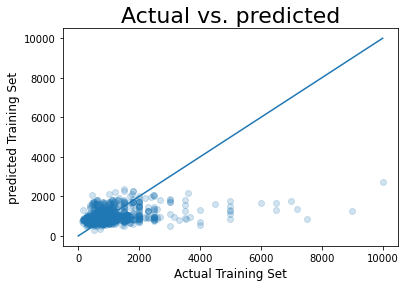

In [ ]:
# Actual Training Set(x) vs. predicted Training Set(y)
dep_train_pred = lr.predict(indp_train)

plt.scatter(dep_train, dep_train_pred, alpha=0.2)#cross valid do train only 
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set', size=12)
plt.plot([0, 10000], [0, 10000])
plt.show()

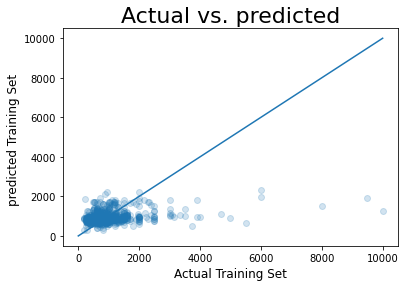

In [ ]:
# Actual Test Set(x) vs. predicted Test Set(y)
dep_test_pred = lr.predict(indp_test)#cross valid do train only 

plt.scatter(dep_test, dep_test_pred, alpha=0.2)
plt.title("Actual vs. predicted", size=22)
plt.xlabel('Actual Training Set', size=12)
plt.ylabel('predicted Training Set ', size=12)
plt.plot([0, 10000], [0, 10000])
plt.show()